Programming Exercise1: Linear Regression

In [6]:
import numpy as np
import matplotlib.pyplot as plt

2 Linear regression with one variable

In [16]:
# 从数据文件中读取数据，并将其添加到X-Y轴
datafile = 'ex1data1.txt'
datafile2 = 'ex1data1_CP1.txt' # test
# read file
cols = np.loadtxt(datafile, delimiter=',', usecols=(0,1), unpack=True)
# cols2 = np.loadtxt(datafile2, delimiter=',', usecols=(0,1), unpack=True)
# print(cols[:-1]) # 获取第一行
# print(cols[-1:]) # 获取最后一行

# form the usual "X" matrix and "Y" matrix
X = np.transpose(np.array(cols[:-1]))
Y = np.transpose(np.array(cols[-1:]))
m = Y.size # number of training examples

# insert the usual column of 1's into the "X" matrix
# 设X0=1，向矩阵插入X0
X = np.insert(X, 0, 1, axis=1)



In [26]:
# test [,]
# print(X[:,1])
# print(Y[:,0])
# print(X)
# print(Y)

2.1 Plotting the Data 绘制数据

Text(0.5, 0, 'Population of City in 10,000s')

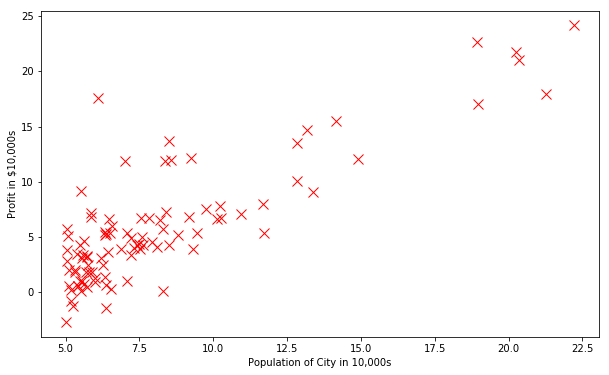

In [22]:
# 创建自定义图像
plt.figure(figsize=(10,6))
# 画点
plt.plot(X[:,1], Y[:,0], 'rx', markersize=10)
# 设置网格
# plt.grid(True)
# X，Y轴内容
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

2.2 Gradient Descent

In [33]:
iterations = 1500 # 循环次数，1500
alpha = 0.01 # 学习率

In [34]:
# Hypothesis function
def h(theta, X):
    return np.dot(X, theta) # return ø0X0 + ø1X1 ...

In [83]:
# Cost function
def computeCost(mytheta, X, Y):
    """
    theta_start(mytheta) is an n-dimensinal vector of initial theta guess
    X is a matrix with n-columns and m-rows
    Y is a matrix with m-rows    and 1 column
    """
    # cost function
    # dot(a.T, a) => a向量的平方
    # m => no. training sets
    return float((1./(2*m))*np.dot((h(mytheta, X)-Y).T, (h(mytheta, X)-Y)))

# test that running computeCost with 0's as theta returns 32.07   
# 32.07为目标cost
# (X.shape[1], 1) =》 n行1列矩阵：(theta is a vector with n rows and 1 columns (if X has n features) )
initial_theta = np.zeros((X.shape[1], 1))
print (computeCost(initial_theta, X, Y))
    

32.072733877455676


In [84]:
# test
# print (X.shape[1])
# print (initial_theta)

In [85]:
# actual gradient descent minimizing routine
def descentGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n-dimensional vector of initial theta guess
    X is a matrix with n-columns and m-rows
    """
    theta = theta_start
    # 用来保存cost function计算结果 《= used to plot cost as function of iteration
    jvec = []
    # 用来保存theta计算后的历史记录 《= used to visualize the minimization path later on
    thetahistory = []
    
    for meaninglessVariable in range(iterations):
        tempTheta = theta
        jvec.append(computeCost(tempTheta, X, Y))
        # Buggy line
        # thetahistory.append(list(tempTheta))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        # 同步更新theta的值 《= simultaneously updating theta values
        for j in range(len(tempTheta)):
            # 梯度下降计算的循环
            # m => no. training sets
            tempTheta[j] = theta[j] - (alpha*1/m)*np.sum((h(initial_theta, X)-Y)*np.array(X[:,j]).reshape(m,1))
            # print(m, np.array(X[:,j]))
        theta = tempTheta
    return theta, thetahistory, jvec


In [86]:
# actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1], 1))
theta, thetaHistory, jvec = descentGradient(X, initial_theta)

# print (theta)


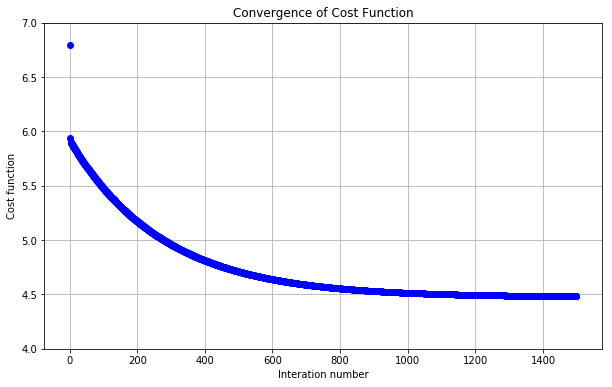

In [52]:
# plot the convergence 集合，收敛 of the cost function
def plotConvengence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)), jvec, 'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Interation number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations, 1.05*iterations])
    
plotConvengence(jvec)
dummy = plt.ylim([4,7])


[-3.63606348] [1.16698916]


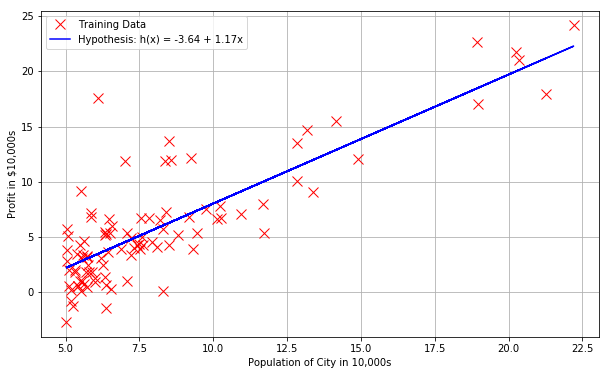

In [59]:
# 绘制线性回归模型 《= plot the line on the top of the data to ensure it looks correct
def myfit(xval):
    # theta是根据梯度下降获得的局部最优值
    print (theta[0], theta[1])
    return theta[0] + theta[1]*xval

plt.figure(figsize=(10,6))
plt.plot(X[:,1], Y[:,0], 'rx', markersize=10, label='Training Data')
plt.plot(X[:,1], myfit(X[:,1]), 'b-', label='Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1]))
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()


2.4 Visualizing J(ø)

In [63]:
# import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

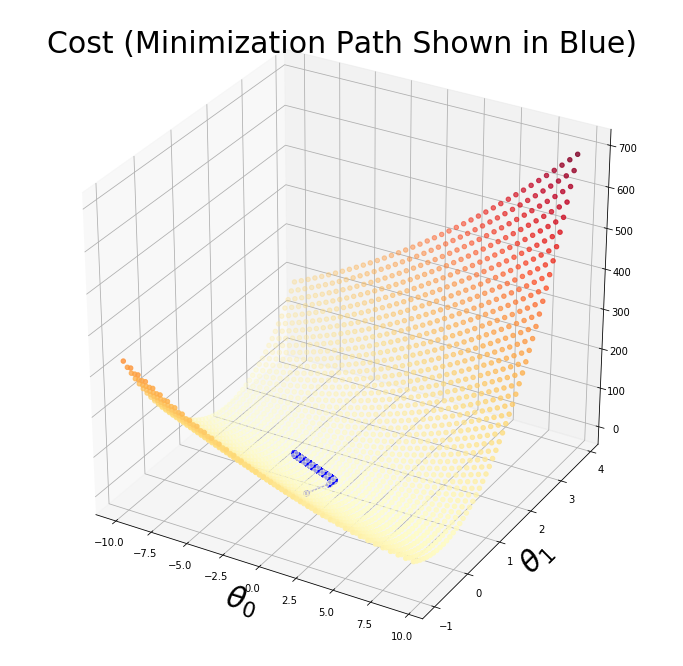

In [68]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10, 10, .5)
yvals = np.arange(-1, 4, .1)
myxs, myys, myzs = [], [], []

# 绘制3-d模型中的点
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        #                 theta = np.array([[david], [kaleko]])
        myzs.append(computeCost(np.array([[david], [kaleko]]), X, Y))

# scatter()       x,    y,    z,    color,          参考colorMap映射   
scat = ax.scatter(myxs, myys, myzs, c=np.abs(myzs), cmap=plt.get_cmap('YlOrRd'))        

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetaHistory],[x[1] for x in thetaHistory],jvec,'bo-')
plt.show()
        
        

3.Linear Regression with mutiple variables

In [90]:
datafile = 'ex1data2.txt'
# read into the data file
# read in comma(,) separated data
cols = np.loadtxt(datafile, delimiter=',', usecols=(0,1,2), unpack=True)
# from the usual 'X' matrix and 'Y' vector
X = np.transpose(np.array(cols[:-1]))
Y = np.transpose(np.array(cols[-1:]))
m = Y.size

# insert the usual column of 1's into the 'X' matrix
X = np.insert(X, 0, 1, axis=1)


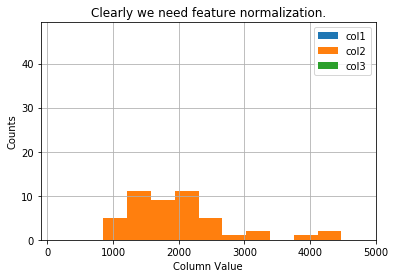

In [92]:
# quick visualize data
plt.grid(True)
plt.xlim([-100, 5000])
# hist 直方图
dummy = plt.hist(X[:,0], label='col1')
dummy = plt.hist(X[:,1], label='col2')
dummy = plt.hist(X[:,2], label='col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

3.1 Feature Normalization

In [95]:
# featuring nomalizing the columns (substract mean, divide by standard deviation)
# store the mean and std for later use
stored_feature_means, stored_feature_stds = [], []

# note don't modify the original X matrix, use a copy
Xnorm = X.copy()

for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    
    # skip the first column
    if not icol: continue
    
    # faster to not recompute the mean and std again
    # just used the stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]



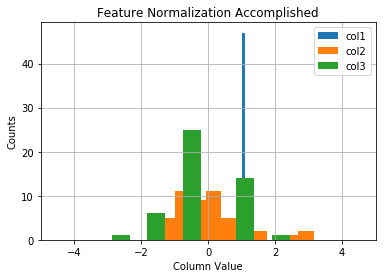

In [96]:
# quick visualize the feature-nornalized data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

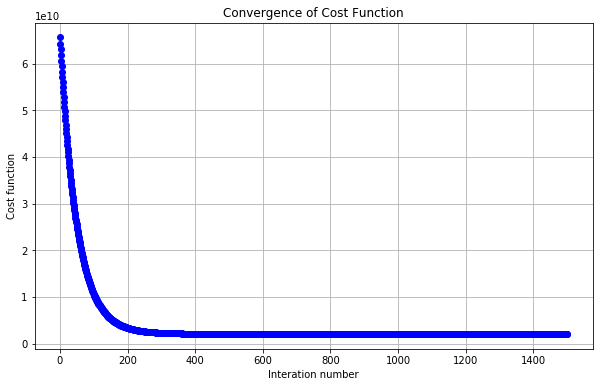

In [100]:
#Run gradient descent with multiple variables, initial theta still set to zeros
#(Note! This doesn't work unless we feature normalize! "overflow encountered in multiply")
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descentGradient(Xnorm,initial_theta)

#Plot convergence of cost function:
plotConvengence(jvec)



In [102]:
# print "final result theta parameters"
print ("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
ytest = np.array([1650., 3.])
# to "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytestscaled = [(ytest[x] - stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
print ("$%0.2f" % float(h(theta, ytestscaled)))






Check of result: What is price of house with 1650 square feet and 3 bedrooms?
$293098.15


In [103]:
from numpy.linalg import inv
# implementation of normal equation to find analytic solution to linear regression
def normEquation(X, Y):
    # inv =》 倒数 or -1次方
    return np.dot(np.dot(inv(np.dot(X.T, X)), X.T), Y)

In [107]:
print ("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")
print ("$%0.2f" % float(h(normEquation(X, Y),[1,1650.,3])))



Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$293081.46
